In [1]:
# Enable inline plotting in notebook
%matplotlib inline
# Populate namespace with numerical python function library and matplotlib plotting library.
import matplotlib.pyplot as plt
import numpy as np

This notebook provides an example of measuring the time delays between images of lensed quasars. 


Similar to previously, the lightcurves are read as follows:
 - Each lightcurve for each telescope is saved as a .dat file where each column is time, flux, flux_err. 
 - The directory for these files is specified
 - The files are named "ObjName"\_"image"\.dat

The priors are unform and are given as: 

priors = [[A1_lower, A1_upper], [B1_lower, B1_upper], [tau_lower, tau_upper],[delta_lower, delta_upper], [sig_lower, sig_upper], [P_lower, P_upper]], where the A1 and B1 are the rms and mean of the first lightcurve in the arbitrary flux units, tau is the time delays between images, delta is the ROA window width, sig is the extra variance parameter and P is the prior range for all the microlensing polynomial coefficients.

As these lightcurves are given in magnitudes, they are converted into arbitrary flux units before modelling, where flux = 3.0128e-5 10^(-0.4m). This factor of 3.0128e-5 can be changed in the function.

The following is an example for PG 1115+080

Initial Parameter Values
  σ1    τ1     P_10        P_11       P_12        P_13        P_14    σ2    τ2     P_20       P_21       P_22        P_23        P_24    σ3       A1      B1    Δ
----  ----  -------  ----------  ---------  ----------  ----------  ----  ----  -------  ---------  ---------  ----------  ----------  ----  -------  ------  ---
0.02     0  2.56618  0.00966038  0.0397536  0.00110354  -0.0280211  0.02     0  2.22843  0.0126865  0.0242708  -0.0085786  -0.0441532  0.02  1.19128  42.184   10
Nwalkers =  48


100%|██████████| 20000/20000 [13:53<00:00, 24.00it/s]


Best Fit Parameters
      σ1       τ1     P_10       P_11       P_12       P_13        P_14         σ2        τ2     P_20        P_21       P_22         P_23        P_24         σ3       A1       B1        Δ
--------  -------  -------  ---------  ---------  ---------  ----------  ---------  --------  -------  ----------  ---------  -----------  ----------  ---------  -------  -------  -------
0.188264  6.88621  2.57092  0.0210348  0.0369573  -0.010151  -0.0336051  0.0273418  -9.48954  2.21932  0.00387436  0.0328657  -0.00448118  -0.0364222  0.0270014  1.27592  41.9916  4.73932


/home/fergus/Documents/MPhysProj/GitHub/PyROA.py:2635: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


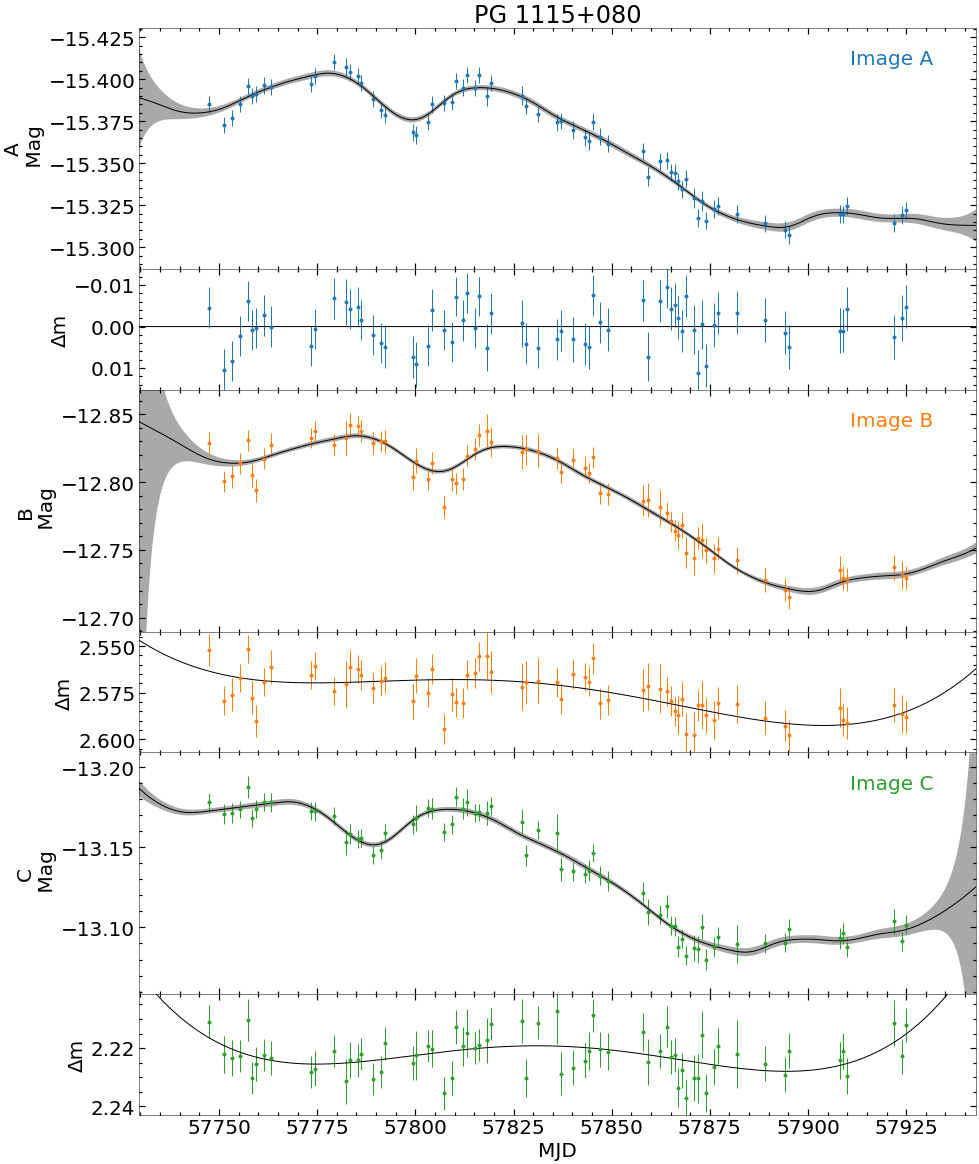

In [2]:
import PyROA
datadir = "/home/fergus/Documents/MPhysProj/GitHub/PG 1115+080/"
objName="PG 1115+080"
images=["A","B","C"]

priors = [[0.0, 5.0],[0.0, 50.0], [-400.0, 400.0], [2.5, 150.0], [0.0, 2.0], [-50.0, 50.0]]

fit = PyROA.GravLensFit(datadir, objName, images, priors, init_delta=10.0, Nsamples=20000, Nburnin=15000)